In [1]:
import sys
sys.path.append('../')

import numpy as np
import scipy
import tqdm
import utils
import geometry
from phantom import Phantom
from tissue import Tissue
from transducer import Transducer, Focused, Planewave
from transducer_set import TransducerSet
from simulation import SimProperties, Simulation
from sensor import Sensor
from experiment import Experiment
from reconstruction import Reconstruction

import matplotlib.pyplot as plt

import kwave
import glob
import plotly.express as px
import SimpleITK as sitk

# Create phantom from scratch

In [2]:
phantom = Phantom(source_path = None,
            voxel_dims = (0.1e-3,0.1e-3,0.1e-3),
            matrix_dims = (256,256,256),
            baseline = (1500, 1000),
            seed = 5678,)

blood = Tissue(name='blood', c=1578, rho=1060, sigma=11.3, scale=0.00001, label=1)
myocardium = Tissue(name='myocardium', c=1561.3, rho=1081, sigma=30, scale=0.0001, label=2)

phantom.add_tissue_sphere((0,0,0), 128, myocardium)
phantom.add_tissue_sphere((0.5,0,0), 32, blood)
phantom.add_tissue_sphere((-0.5,0,0), 32, blood)
phantom.add_tissue_sphere((0,0.5,0), 32, blood)
phantom.add_tissue_sphere((0,-0.5,0), 32, blood)
phantom.add_tissue_sphere((0,0,0.5), 32, blood)
phantom.add_tissue_sphere((0,0,-0.5), 32, blood)

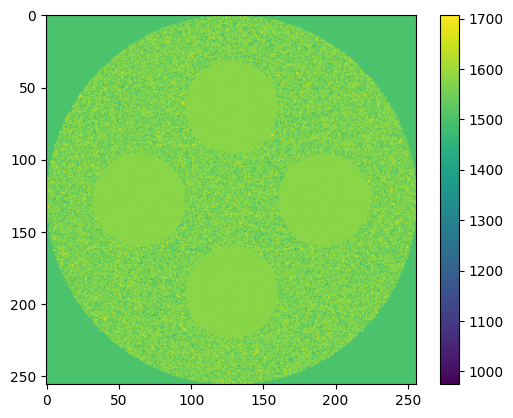

In [3]:
plt.imshow(phantom.get_complete()[0,phantom.matrix_dims[1]//2,:,:], vmin=np.amin(phantom.get_complete()), vmax=np.amax(phantom.get_complete()))
plt.colorbar()

# Create phantom from image

In [5]:
image = sitk.GetArrayFromImage(sitk.ReadImage(glob.glob('../../images/*.mhd')[0]))[0:200,120:470,35:435]
# phantom.create_from_image(image, input_voxel_size=(0.5e-3,0.35e-3,0.35e-3), target_voxel_size=(0.2e-3,0.2e-3,0.2e-3), transfer_fn=None)

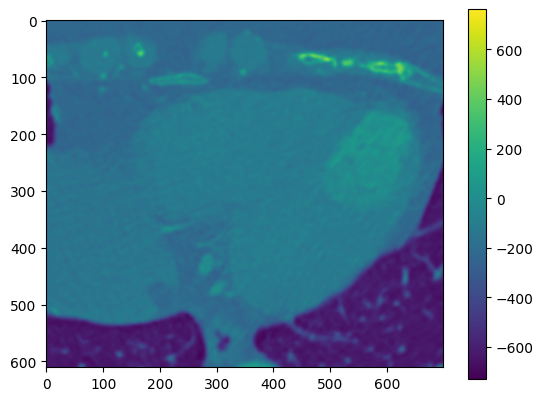

In [ ]:
plt.imshow(phantom.get_complete()[0,phantom.matrix_dims[1]//2,:,:], vmin=np.amin(phantom.get_complete()), vmax=np.amax(phantom.get_complete()))
plt.colorbar()

# utils.save_mrc(phantom.get_complete(), 'phantom.mrc')

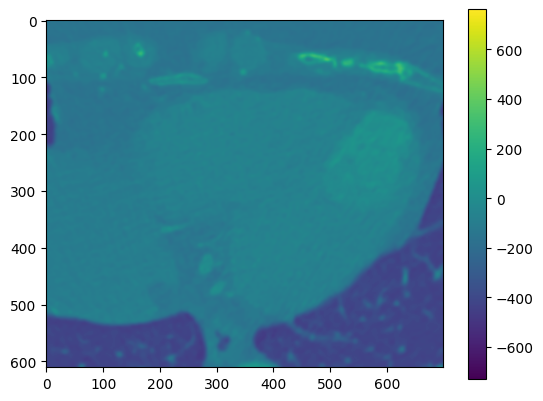

In [ ]:
plt.imshow(phantom.get_complete()[1,phantom.matrix_dims[1]//2,:,:], vmin=np.amin(phantom.get_complete()), vmax=np.amax(phantom.get_complete()))
plt.colorbar()

In [ ]:
phantom.get_complete().shape

(2, 498, 611, 699)

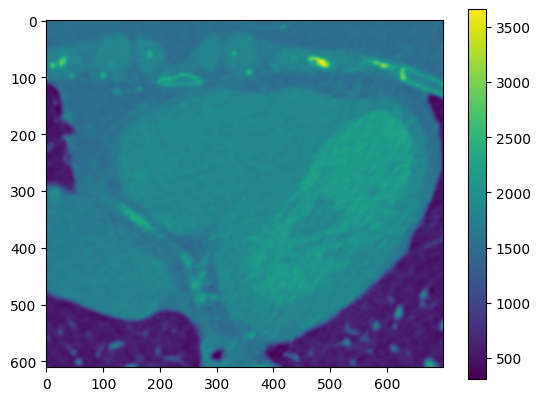

In [ ]:
corrected = (phantom.get_complete()[0] - np.amin(phantom.get_complete()[0])) * 2.5 + 300

plt.imshow(corrected[155,:,:])
plt.colorbar()

In [ ]:
image = sitk.GetArrayFromImage(sitk.ReadImage(glob.glob('../../images/*.mhd')[4]))

In [ ]:
image.shape

(254, 512, 512)

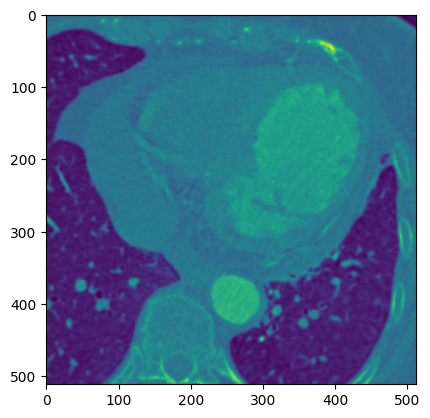

In [ ]:
plt.imshow(image[100,:,:])

In [ ]:
utils.save_mrc(image, 'image.mrc')

In [2]:
from PIL import Image

paths = sorted(glob.glob('../../images/hando/*.png'))
images = []
for path in paths:
    images.append(np.array(Image.open(path), dtype=np.float32))
    
image = np.stack(images, axis=0)

image = image[300:]

corrected = ((image/255)**3*400 + 1500)/1500

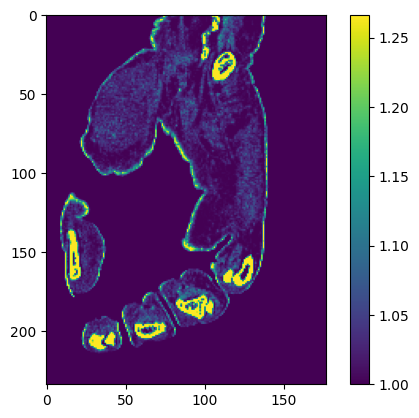

In [3]:
plt.imshow(corrected[::3,50,:])
plt.colorbar()

In [4]:
phantom = Phantom(source_path = None,
            voxel_dims = (0.1e-3,0.1e-3,0.1e-3),
            matrix_dims = (256,256,256),
            baseline = (1500, 1000),
            seed = 5678,)

phantom.create_from_image(corrected, input_voxel_size=(0.2e-3,0.61e-3,0.61e-3), target_voxel_size=(0.1e-3,0.1e-3,0.1e-3), transfer_fn=None)

desired phantom array size is very large (>500,000,000 voxels), consider supplying a larger target_voxel_size or cropping the input image


In [5]:
phantom.get_complete().shape

(2, 1398, 690, 1074)

In [6]:
phantom.complete = phantom.complete.transpose(0,2,3,1)

In [7]:
# utils.save_mrc(phantom.get_complete(), 'hando.mrc')

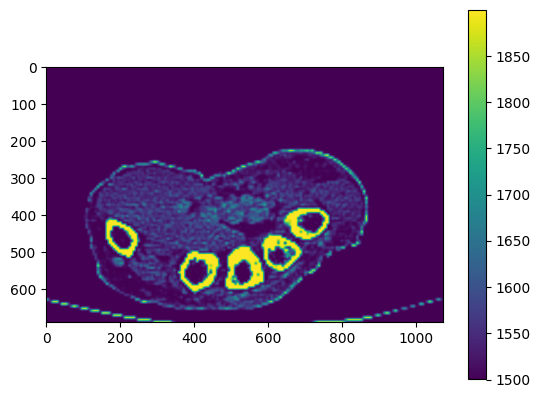

In [8]:
plt.imshow(phantom.get_complete()[0][:,:,400])
plt.colorbar()

In [9]:
phantom.save('hand_phantom')

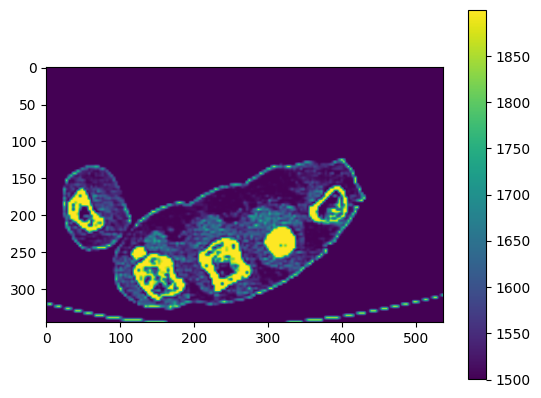

In [39]:
plt.imshow(phantom.get_complete()[0][400,:,:])
plt.colorbar()